In [1]:
import numpy

# !pip install torch
import torch
import matplotlib.pyplot as plt


def show_s(s):
    plt.scatter(range(0, 7), s[0], s=s[1] * s[0] * 1000)
    plt.ylim(0, 1.1)
    plt.show()


def ttt_interpolate(t1, t2, delta):
    assert t1[0].shape == t1[1].shape
    assert t2[0].shape == t2[1].shape
    assert t1[0].shape == t2[1].shape

    t1_prec = torch.zeros_like(t1[1])
    t2_prec = torch.zeros_like(t2[1])

    t1_prod = t1[0] * t1[1]
    mask1 = t1_prod >= delta
    t1_prec[mask1] = t1[1][mask1] * (1 - delta)
    # print("t1_prec", t1_prec)

    t2_prod = t2[0] * t2[1]
    mask2 = (t2_prod < delta) & (t2_prod > 0.01)
    t2_prec[mask2] = t2[1][mask2]  # * delta / (1 - delta)
    # print("t2_prec", t2_prec)

    total_prec = t1_prec + t2_prec
    # print("total_prec", total_prec)

    total_mask = total_prec > 0.0
    # print("total_mask", total_mask)

    t1_pixels = torch.zeros_like(t1[0])
    t1_pixels[mask1] = t1[0][mask1]
    # print("t1_pixels", t1_pixels)

    t2_pixels = torch.zeros_like(t2[0])
    t2_pixels[mask2] = t2[0][mask2]
    # print("t2_pixels", t2_pixels)

    t_pixels = torch.zeros_like(t1[0])
    t_pixels[total_mask] = (
        t1_pixels[total_mask] * t1_prec[total_mask] + t2_pixels[total_mask] * t2_prec[total_mask]
    ) / total_prec[total_mask]
    # print("t_pixels", t_pixels)
    t1_prec[mask2] = t2_prec[mask2]
    # print("prec", t1_prec)

    return [t_pixels, t1_prec]



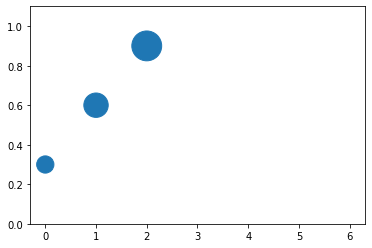

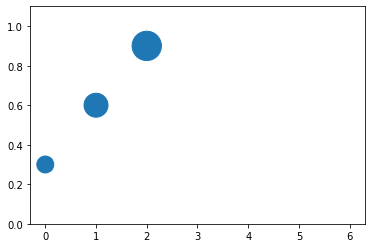

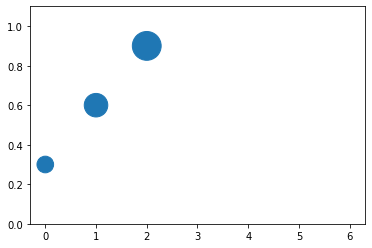

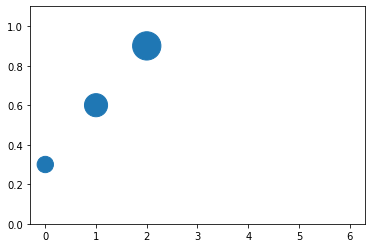

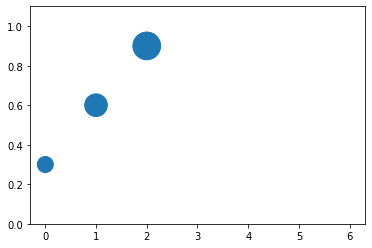

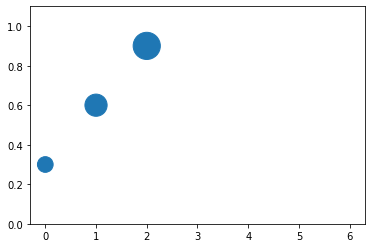

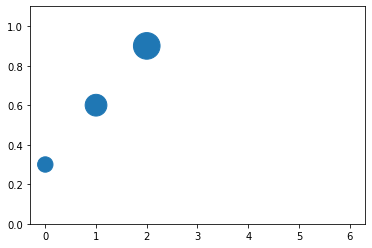

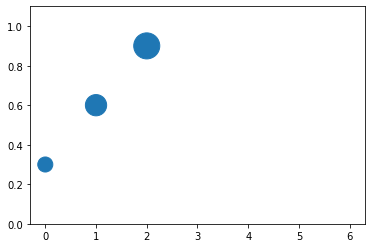

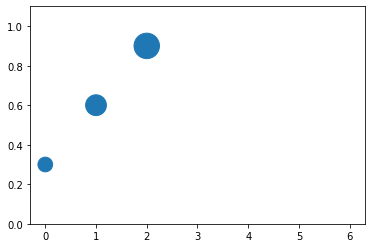

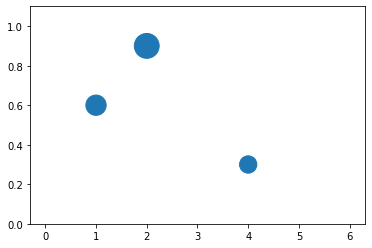

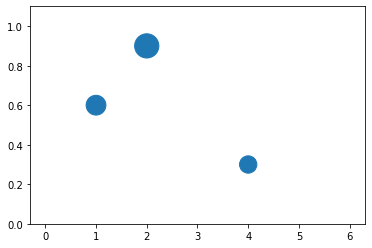

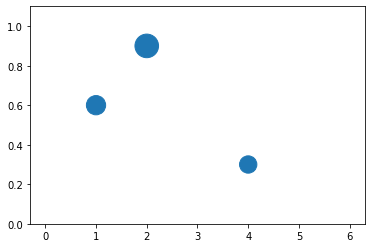

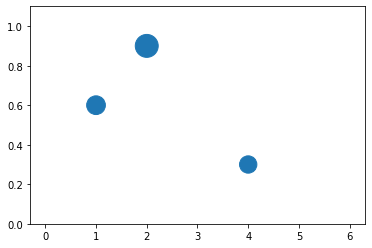

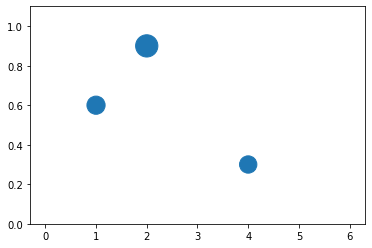

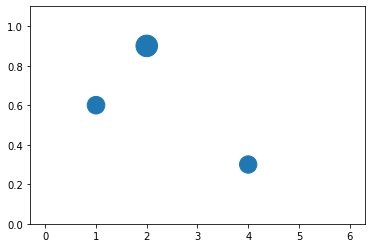

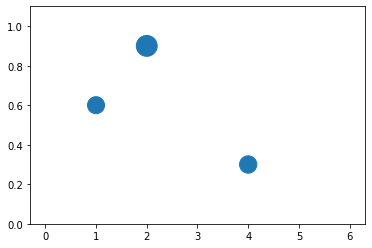

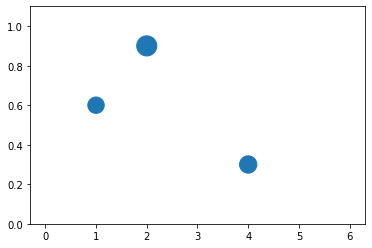

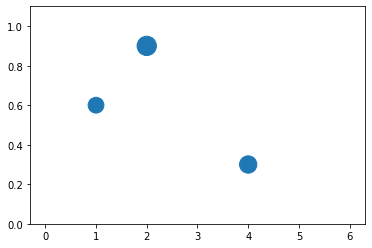

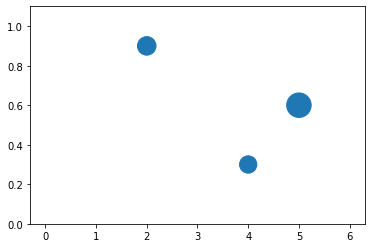

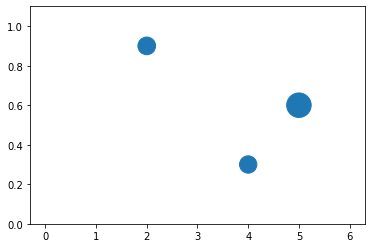

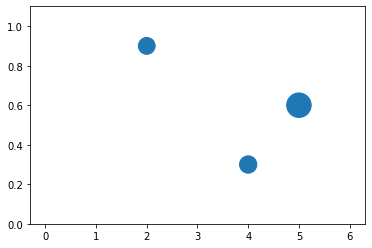

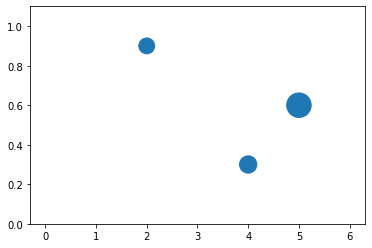

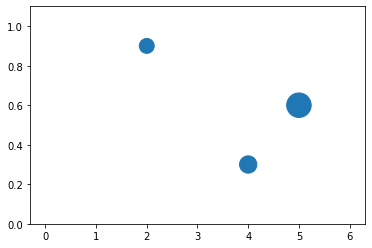

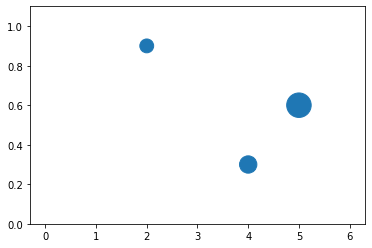

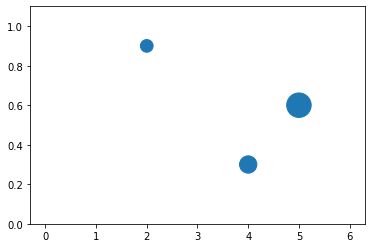

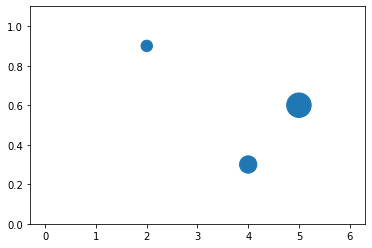

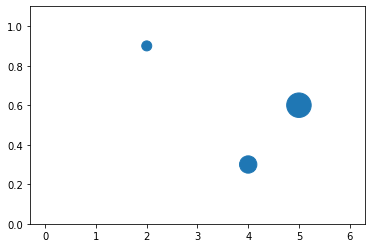

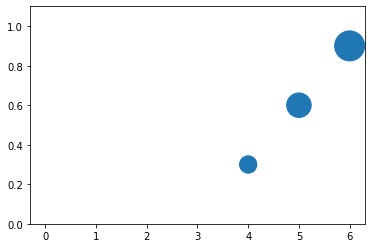

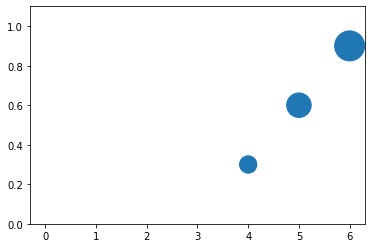

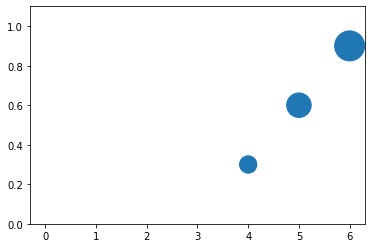

In [11]:
# # Disjoint -- binary pixels, float precision
# ss = [
#   [torch.tensor([1., 1., 1., 0., 0., 0., 0.]), torch.tensor([0.3, 0.6, 0.9, 0.0, 0.0, 0.0, 0.0])],
#   [torch.tensor([0., 0., 0., 0., 1., 1., 1.]), torch.tensor([0.0, 0.0, 0.0, 0.0, 0.3, 0.6, 0.9])]
# ]

# Disjoint -- float pixels, all precision = 1
ss = [
  [torch.tensor([0.3, 0.6, 0.9, 0.0, 0.0, 0.0, 0.0]), torch.tensor([1., 1., 1., 1., 1., 1., 1.])],
  [torch.tensor([0.0, 0.0, 0.0, 0.0, 0.3, 0.6, 0.9]), torch.tensor([1., 1., 1., 1., 1., 1., 1.])]
]

# # Overlapping
# ss = [
#   [torch.tensor([1., 1., 1., 0., 0., 0., 0.]), torch.tensor([0.3, 0.6, 0.9, 0.0, 0.0, 0.0, 0.0])],
#   [torch.tensor([0., 0., 1., 1., 1., 0., 0.]), torch.tensor([0.0, 0.0, 0.3, 0.6, 0.9, 0.0, 0.0])]
# ]

# # Disjoint, Non 1.0 pixels
# ss = [
#   [torch.tensor([0.2, 0.5, 0.9, 0., 0., 0., 0.]), torch.tensor([0.3, 0.6, 0.9, 0.0, 0.0, 0.0, 0.0])],
#   [torch.tensor([0., 0., 0., 0., 0.2, 0.5, 0.9]), torch.tensor([0.0, 0.0, 0.0, 0.0, 0.3, 0.6, 0.9])]
# ]

# # Overlapping, Non 1.0 pixels
# ss = [
#   [torch.tensor([0.5, 0.2, 0.9, 0., 0., 0., 0.]), torch.tensor([0.3, 0.6, 0.9, 0.0, 0.0, 0.0, 0.0])],
#   [torch.tensor([0., 0., 0.1, 0.8, 0.4, 0., 0.]), torch.tensor([0.0, 0.0, 0.3, 0.6, 0.9, 0.0, 0.0])]
# ]

for delta in numpy.linspace(0.01, 0.99, 30):
  t = ttt_interpolate(ss[0], ss[1], delta=delta)
  show_s(t)